### dataset taken from https://www.kaggle.com/c/demand-forecasting-kernels-only/data

# step 1: data preprocessing and analysis

# i .preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object
itemno = 2#select item (1 to 50)
dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
# for example, to get the sum each day:
# df.groupby(df['date'].dt.date).sum()
train, test = np.split(dffiltered, [int(.8*len(dffiltered))])#first ko ma .8 jancha
df=train
print(df.head())
print(df.values[2])

            date  item  sales
18260 2013-01-01     2     33
18261 2013-01-02     2     43
18262 2013-01-03     2     23
18263 2013-01-04     2     18
18264 2013-01-05     2     34
            item  sales
date                   
2013-01-01    20    327
2013-01-02    20    279
2013-01-03    20    304
2013-01-04    20    359
2013-01-05    20    377
            sales
date             
2013-01-01    327
2013-01-02    279
2013-01-03    304
2013-01-04    359
2013-01-05    377
[304]


# ii. analysis

In [2]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06   2067
2013-01-13   2350
2013-01-20   2427
2013-01-27   2329
2013-02-03   2414
            sales
date             
2013-01-31  10379
2013-02-28  10338
2013-03-31  13933
2013-04-30  14938
2013-05-31  17179
            sales
date             
2016-12-26    371
2016-12-27    437
2016-12-28    418
2016-12-29    490
2016-12-30    498


c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

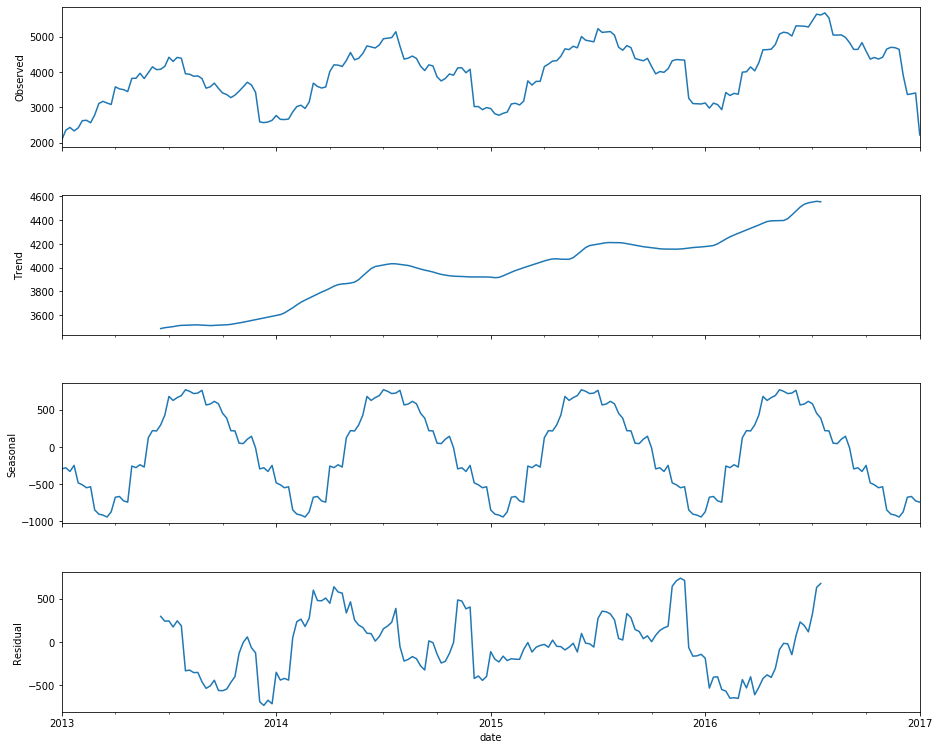

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [5]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

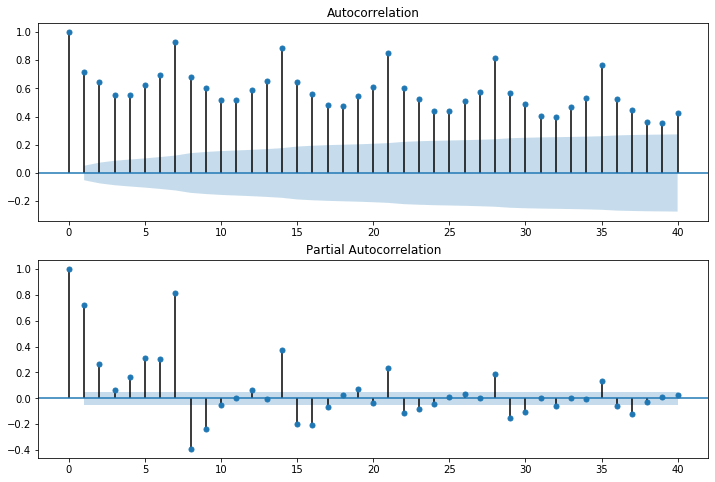

In [6]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

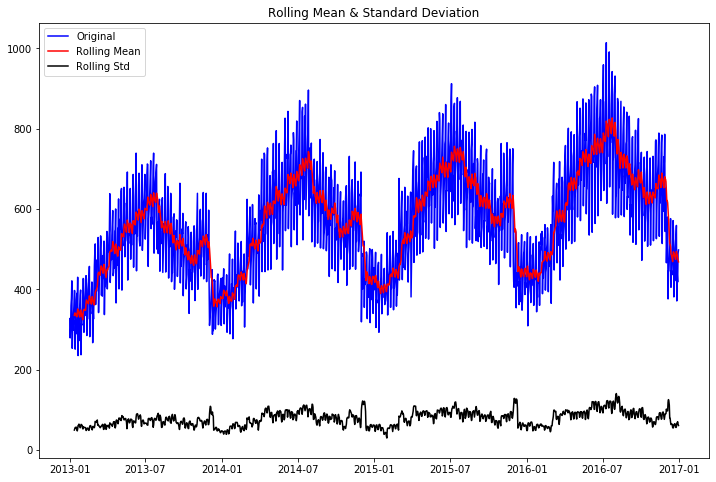

Results of Dickey-Fuller Test:
p-value = 0.1462. The series is likely non-stationary.
Test Statistic                   -2.384356
p-value                           0.146200
#Lags Used                       20.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64


In [7]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [8]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

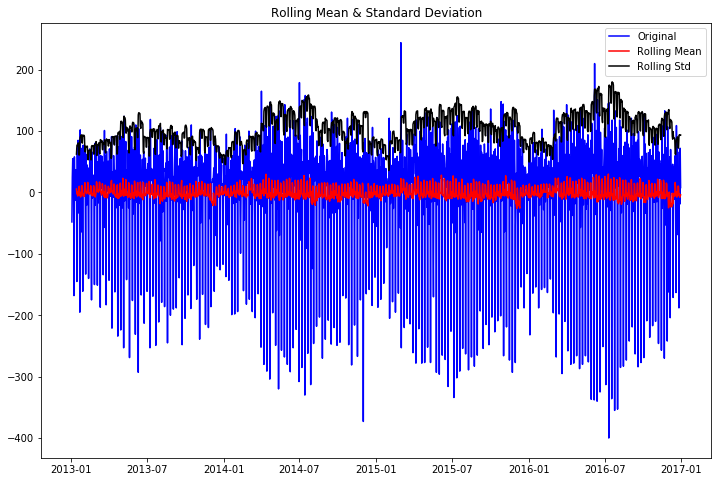

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.390319e+00
p-value                        6.587881e-16
#Lags Used                     2.000000e+01
Number of Observations Used    1.438000e+03
Critical Value (1%)           -3.434906e+00
Critical Value (5%)           -2.863552e+00
Critical Value (10%)          -2.567841e+00
dtype: float64


In [9]:
test_stationarity(first_diff, window = 12)

In [10]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02  -48.0
1    2013-01-03   25.0
2    2013-01-04   55.0
3    2013-01-05   18.0
4    2013-01-06   44.0
5    2013-01-07 -168.0
6    2013-01-08   58.0
7    2013-01-09  -13.0
8    2013-01-10   37.0
9    2013-01-11   25.0
10   2013-01-12   37.0
11   2013-01-13   -1.0
12   2013-01-14 -145.0
13   2013-01-15   72.0
14   2013-01-16  -34.0
15   2013-01-17   85.0
16   2013-01-18   16.0
17   2013-01-19  -20.0
18   2013-01-20   60.0
19   2013-01-21 -195.0
20   2013-01-22  102.0
21   2013-01-23  -65.0
22   2013-01-24   72.0
23   2013-01-25   14.0
24   2013-01-26   27.0
25   2013-01-27   13.0
26   2013-01-28 -161.0
27   2013-01-29   77.0
28   2013-01-30   -3.0
29   2013-01-31   33.0
...         ...    ...
1429 2016-12-01 -162.0
1430 2016-12-02   45.0
1431 2016-12-03   11.0
1432 2016-12-04   58.0
1433 2016-12-05 -204.0
1434 2016-12-06   70.0
1435 2016-12-07    0.0
1436 2016-12-08   30.0
1437 2016-12-09   36.0
1438 2016-12-10   1

# Step 4: Plot ACF and PACF plots

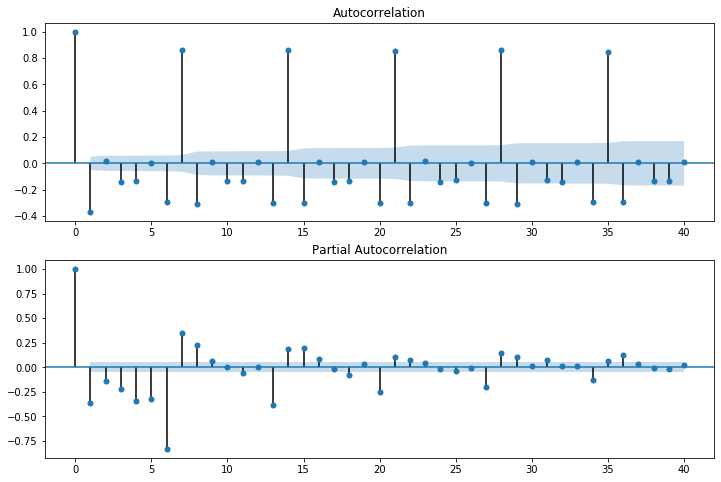

In [11]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6: Fit the model

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


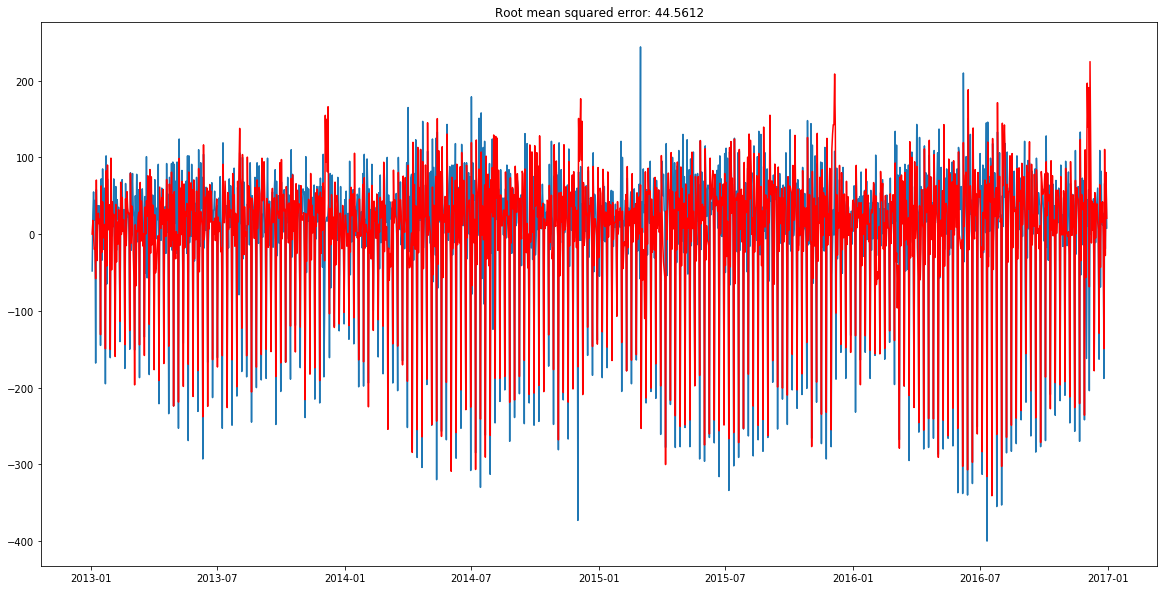

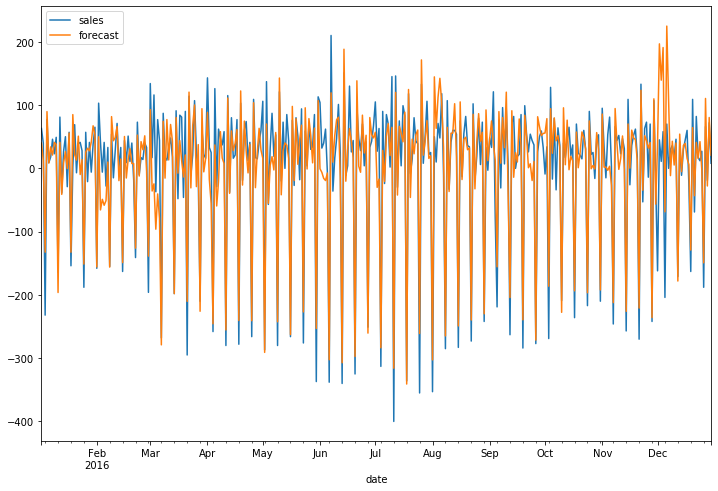

In [12]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

# Step 7: Test the model

# i. Testing the fitted values in original scale

## i. a) converting fitted values to original scale

In [13]:
#Let "xd" denote the differenced data and "x" denote the original data. 
#Then xd[n]=x[n+1]-x[n]. Therefore, x[n+1]=x[n]+xd[n]. 
#If you add the first element of first difference forecast to the real data with the same indice, then you will get the next real data forecast.
#here used xd[n] = x[n] -x[n+1] so first becomes nan
fittedOrgScale= df.copy()#data frame has values in sales
xd= results_ARIMA.fittedvalues# series has values in values
print(type(results_ARIMA.fittedvalues))

xd=pd.concat([pd.Series([0]),xd])
end=fittedOrgScale.shape[0]#for for loop in next cell
print(fittedOrgScale.values)


<class 'pandas.core.series.Series'>
[[327]
 [279]
 [304]
 ...
 [418]
 [490]
 [498]]


In [14]:
print(fittedOrgScale.values[0])
#run above to run this 
j=0
for i in fittedOrgScale.index:
    
    fittedOrgScale.values[j] = fittedOrgScale.values[j+1] + xd.values[j]
    print('adding',j,fittedOrgScale.values[j+1],'+',xd.values[j],fittedOrgScale.values[j])
    j+=1
    if j+1 ==end:
        break



[327]
adding 0 [279] + 0.0 [279]
adding 1 [304] + 0.09616406777687558 [304]
adding 2 [359] + 17.829096847512215 [376]
adding 3 [377] + -3.789684339873034 [373]
adding 4 [421] + -19.75552875385391 [401]
adding 5 [253] + -18.74159576012581 [234]
adding 6 [311] + -58.09041830446394 [252]
adding 7 [298] + 70.48359725936828 [368]
adding 8 [335] + -34.42435585748559 [300]
adding 9 [360] + 14.088924472005168 [374]
adding 10 [397] + 27.231803043128124 [424]
adding 11 [396] + 13.348387481925563 [409]
adding 12 [251] + 19.508558398540334 [270]
adding 13 [323] + -131.026142014634 [191]
adding 14 [289] + 62.8168713903474 [351]
adding 15 [374] + -23.612121522324657 [350]
adding 16 [390] + 42.130293591340376 [432]
adding 17 [370] + -4.905983251200411 [365]
adding 18 [430] + 9.69885431197837 [439]
adding 19 [235] + 12.73650553164967 [247]
adding 20 [337] + -149.38507196301637 [187]
adding 21 [272] + 82.48591371954168 [354]
adding 22 [344] + -41.461084571400534 [302]
adding 23 [358] + 90.0419493191724

adding 319 [641] + 23.072510139562603 [664]
adding 320 [426] + 9.214829701574175 [435]
adding 321 [467] + -174.26895754008112 [292]
adding 322 [461] + 53.74576006897842 [514]
adding 323 [523] + 9.96135843215448 [532]
adding 324 [539] + 58.63570925962626 [597]
adding 325 [577] + 40.02213135262387 [617]
adding 326 [639] + 27.40573231860198 [666]
adding 327 [419] + 49.826010797752076 [468]
adding 328 [492] + -190.85154335523205 [301]
adding 329 [474] + 54.62396597298796 [528]
adding 330 [536] + -25.08453994849189 [510]
adding 331 [493] + 47.312565734290544 [540]
adding 332 [597] + 5.159582103667205 [602]
adding 333 [411] + 66.70589316857527 [477]
adding 334 [310] + 32.044698917230164 [342]
adding 335 [326] + -34.728359277066744 [291]
adding 336 [343] + 154.84165443153648 [497]
adding 337 [365] + 94.30117442717375 [459]
adding 338 [382] + 149.69000752066648 [531]
adding 339 [409] + 81.2298846508212 [490]
adding 340 [449] + 166.03507328693354 [615]
adding 341 [288] + -42.34037304314913 [245

adding 644 [518] + 128.12810804475512 [646]
adding 645 [541] + 28.551369981963134 [569]
adding 646 [548] + 7.471677402170982 [555]
adding 647 [613] + 35.17860884169161 [648]
adding 648 [643] + 23.36428840037454 [666]
adding 649 [475] + 40.307406808981355 [515]
adding 650 [514] + -205.27777630483 [308]
adding 651 [525] + 19.790919973804538 [544]
adding 652 [538] + 7.4563852044939765 [545]
adding 653 [567] + 14.56752464795281 [581]
adding 654 [579] + 11.541039525419652 [590]
adding 655 [620] + 44.16575160347127 [664]
adding 656 [448] + 41.653025280335 [489]
adding 657 [539] + -131.33778741531214 [407]
adding 658 [519] + 63.63662411142088 [582]
adding 659 [505] + -10.870861705214175 [494]
adding 660 [626] + 16.73549530169418 [642]
adding 661 [649] + 50.731113933416026 [699]
adding 662 [658] + -32.30102986487067 [625]
adding 663 [410] + -18.414458301723947 [391]
adding 664 [486] + -176.63131040912532 [309]
adding 665 [496] + 116.52110582962274 [612]
adding 666 [526] + 13.190093550681569 [5

adding 977 [712] + 51.30846125480818 [763]
adding 978 [519] + 69.36691314710232 [588]
adding 979 [596] + -164.85062261868953 [431]
adding 980 [531] + 64.3288320830153 [595]
adding 981 [597] + -65.1648765405148 [531]
adding 982 [651] + 91.33713172142998 [742]
adding 983 [696] + 54.92803018658726 [750]
adding 984 [758] + 59.48193403461239 [817]
adding 985 [504] + 0.48453093865479246 [504]
adding 986 [542] + -199.2462741330535 [342]
adding 987 [555] + 87.48857500991343 [642]
adding 988 [634] + -22.539632911303656 [611]
adding 989 [687] + 47.701996006357724 [734]
adding 990 [675] + 20.983580707512246 [695]
adding 991 [722] + 13.54245474322375 [735]
adding 992 [507] + 59.511794156069584 [566]
adding 993 [571] + -200.62994422705836 [370]
adding 994 [570] + 47.131720968399435 [617]
adding 995 [628] + -10.301682188948675 [617]
adding 996 [628] + 61.130991833220804 [689]
adding 997 [734] + 48.57695431918554 [782]
adding 998 [749] + 29.319187962005117 [778]
adding 999 [501] + -5.6243649500451625

adding 1310 [709] + 63.19707480763018 [772]
adding 1311 [757] + 112.57733147517621 [869]
adding 1312 [875] + 142.2980108117302 [1017]
adding 1313 [864] + 102.22008766527625 [966]
adding 1314 [579] + 31.801322330076765 [610]
adding 1315 [686] + -264.8410144313924 [421]
adding 1316 [653] + 64.78628214156257 [717]
adding 1317 [694] + -36.59308304461276 [657]
adding 1318 [754] + 55.495615214635315 [809]
adding 1319 [814] + 55.730669702296254 [869]
adding 1320 [868] + 102.13433679240208 [970]
adding 1321 [585] + 18.317285165524282 [603]
adding 1322 [660] + -249.06847359677974 [410]
adding 1323 [647] + 104.99672705575688 [751]
adding 1324 [702] + -17.69133657725849 [684]
adding 1325 [784] + 45.966132571259486 [829]
adding 1326 [820] + 49.12833921232219 [869]
adding 1327 [854] + 29.386228319308465 [883]
adding 1328 [581] + 31.949500206722558 [612]
adding 1329 [683] + -239.7593674648399 [443]
adding 1330 [664] + 85.32547706578174 [749]
adding 1331 [683] + -32.398409376257646 [650]
adding 1332 

In [15]:
#convert to cumulative sum
#1st make data frame as series
#series bata cumsum
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print ('prediction arima diff',type(predictions_ARIMA_diff),predictions_ARIMA_diff.head())
#to cumsum
predictions_ARIMA_diff_cumsum = pd.Series(predictions_ARIMA_diff.cumsum())
print ('cumsum',predictions_ARIMA_diff_cumsum.head())



prediction arima diff <class 'pandas.core.series.Series'> date
2013-01-02     0.096164
2013-01-03    17.829097
2013-01-04    -3.789684
2013-01-05   -19.755529
2013-01-06   -18.741596
dtype: float64
cumsum date
2013-01-02     0.096164
2013-01-03    17.925261
2013-01-04    14.135577
2013-01-05    -5.619952
2013-01-06   -24.361548
dtype: float64


In [16]:
# df1= df.drop(df.index[0])
#dropping first value of original as fitted is from second index
df1=df.drop(df.index[0])
x1=fittedOrgScale.copy()
len(x1)


1460

# rmse of the fitted line for training data

In [17]:
error = df.sales - fittedOrgScale.values.reshape(fittedOrgScale.values.shape[0])
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE = meanError**0.5
highestScale = np.amax(dffiltered.values)
print('The Root Mean Squared Error is',RMSE,'The range of data is 0 to ',highestScale)

The Root Mean Squared Error is 118.0566180630851 The range of data is 0 to  1023


### i.b) plot original vs fitted values in original scale

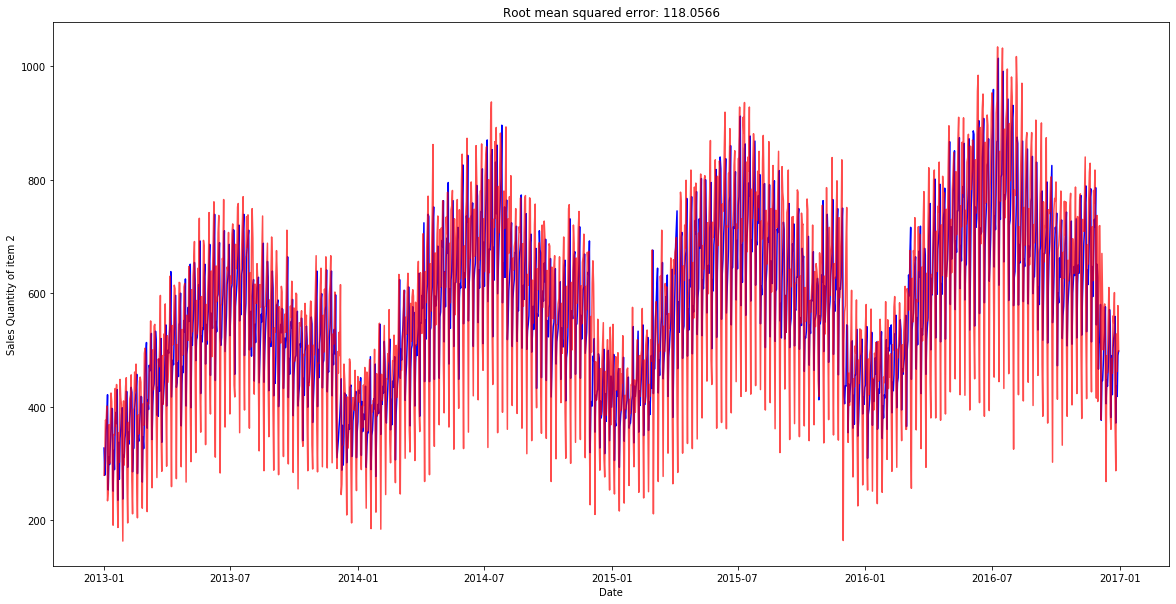

1460 1460


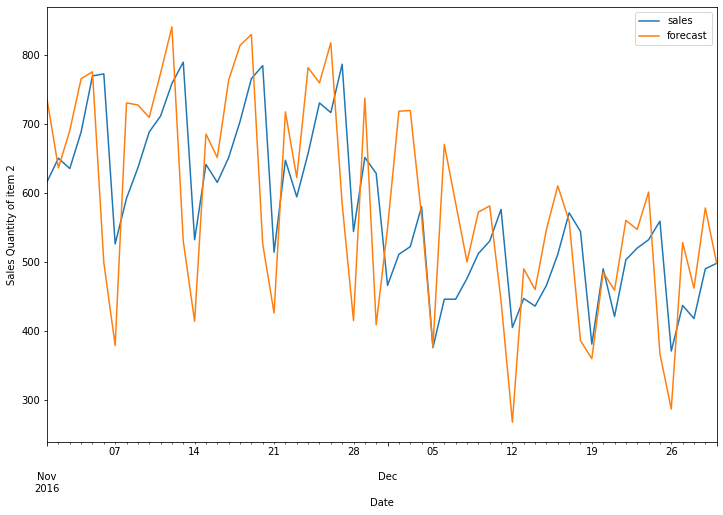

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df.sales,color='blue')
plt.plot(x1,'r-', alpha=0.7)
plt.title('Root mean squared error: %.4f'% RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()
print(len(df),len(x1))
df['forecast'] = x1.values
start_index =1400
end_index =start_index+365

df[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

## ii. Testing the predicted values

In [19]:
fitLen = len(results_ARIMA.fittedvalues)

lastTwo= len(results_ARIMA.fittedvalues)-2*365

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


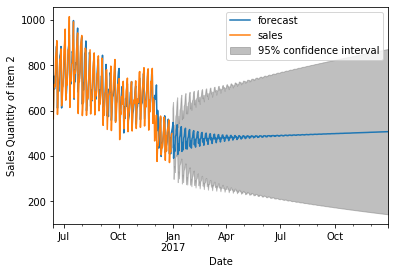

In [20]:
results_ARIMA.plot_predict(fitLen-200,fitLen+365)#start rows + end rows of forecast rows 18260+40
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2016-12-31    524.196711
2017-01-01    547.270801
2017-01-02    390.138855
2017-01-03    446.042156
2017-01-04    419.994789
Freq: D, dtype: float64


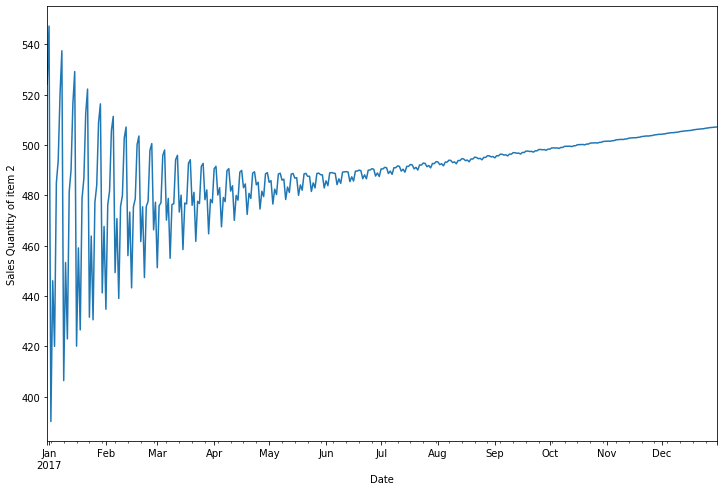

In [21]:
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='levels', dynamic=False) # this works
print(yearPrediction.head())

yearPrediction.plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

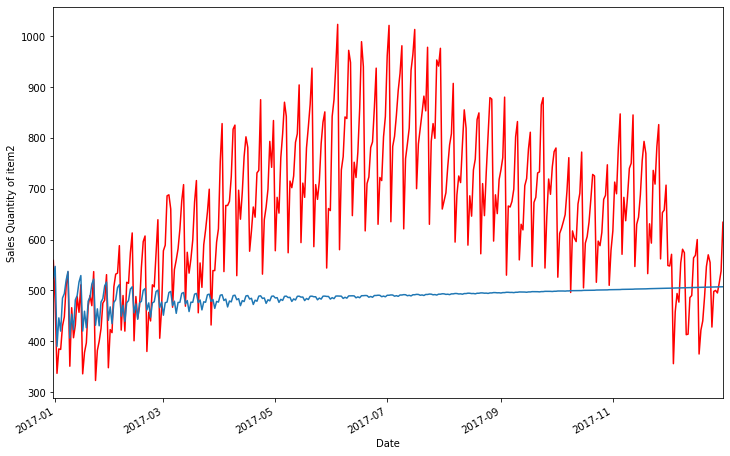

In [22]:
plt.plot(test.sales,color='red',)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item"+str(itemno))
yearPrediction.plot(figsize=(12, 8))
plt.show()

In [23]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2016-12-31    464.196711
2017-01-01    524.074090
2017-01-02    383.868054
2017-01-03    364.903301
2017-01-04    359.952633
2017-01-05    459.992833
2017-01-06    421.785237
2017-01-07    485.513364
2017-01-08    499.166388
2017-01-09    399.911309
2017-01-10    413.919751
2017-01-11    417.660077
2017-01-12    467.445722
2017-01-13    444.627460
2017-01-14    512.349931
2017-01-15    469.833956
2017-01-16    404.860291
2017-01-17    399.047520
2017-01-18    329.428128
2017-01-19    483.340952
2017-01-20    431.887573
2017-01-21    488.818103
2017-01-22    513.658733
2017-01-23    441.338853
2017-01-24    376.236088
2017-01-25    367.711884
2017-01-26    426.670876
2017-01-27    427.822588
2017-01-28    440.006375
2017-01-29    460.330218
                 ...    
2017-12-02    511.149883
2017-12-03    522.046153
2017-12-04    580.227619
2017-12-05    376.071321
2017-12-06    446.120814
2017-12-07    446.054923
2017-12-08    476.016841
2017-12-09    512.137430
2017-12-10    530.050904


c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [24]:
#out sample 
error = orgscale.values-test.values.reshape(test.values.shape[0])
highestScale = np.amax(test.values)
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE2 = meanError**0.5
print(RMSE2,meanAbsoluteError,highestScale)


114.54565361714336 89.53924589483417 1023


The root mean squared error is  114.54565361714336


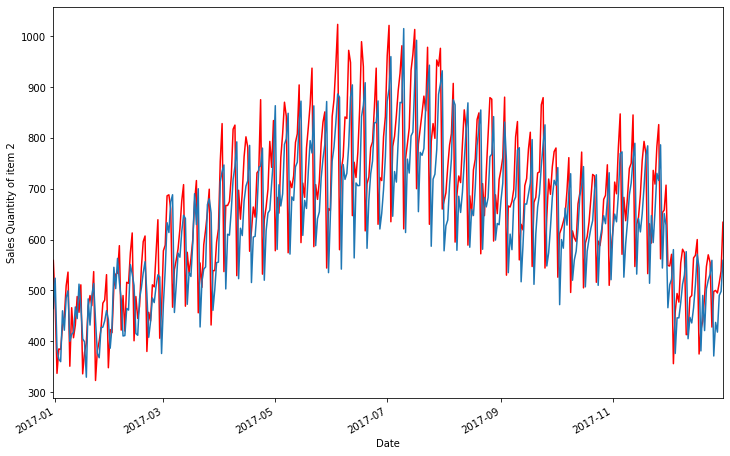

In [31]:
print("The root mean squared error is ",RMSE2)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.plot(test.sales,color='red',)
orgscale.plot(figsize=(12, 8))
plt.show()

In [26]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [27]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  15237.827147301206


# EXPORTING AS JSON

In [28]:
dft= pd.DataFrame({'date':orgscale.index, 'sales quantity':orgscale.values})

dft['date'] = pd.to_datetime(dft['date'])#convert to date time object
dft['item'] = itemno
print(dft.tail())

          date  sales quantity  item
361 2017-12-27      437.125753     2
362 2017-12-28      418.065679     2
363 2017-12-29      490.049787     2
364 2017-12-30      498.112435     2
365 2017-12-31      559.063244     2


In [29]:
export=dft.to_json(orient='records',date_format='iso')

In [30]:
print(export)
dft.to_json(path_or_buf=r'C:\Users\Acer\Desktop\minor\env\src\predicted{}.json'.format(itemno),orient='records',date_format='iso')

[{"date":"2016-12-31T00:00:00.000Z","sales quantity":464.1967105711,"item":2},{"date":"2017-01-01T00:00:00.000Z","sales quantity":524.0740903867,"item":2},{"date":"2017-01-02T00:00:00.000Z","sales quantity":383.8680539638,"item":2},{"date":"2017-01-03T00:00:00.000Z","sales quantity":364.9033008903,"item":2},{"date":"2017-01-04T00:00:00.000Z","sales quantity":359.9526330355,"item":2},{"date":"2017-01-05T00:00:00.000Z","sales quantity":459.9928325322,"item":2},{"date":"2017-01-06T00:00:00.000Z","sales quantity":421.7852367999,"item":2},{"date":"2017-01-07T00:00:00.000Z","sales quantity":485.5133638835,"item":2},{"date":"2017-01-08T00:00:00.000Z","sales quantity":499.1663881329,"item":2},{"date":"2017-01-09T00:00:00.000Z","sales quantity":399.9113092604,"item":2},{"date":"2017-01-10T00:00:00.000Z","sales quantity":413.9197514798,"item":2},{"date":"2017-01-11T00:00:00.000Z","sales quantity":417.6600769803,"item":2},{"date":"2017-01-12T00:00:00.000Z","sales quantity":467.445721864,"item":2}